# Clustering: extraindo padrões de dados - Curso da Alura

## 1. Coleta de dados

In [2]:
import pandas as pd

dataframe = pd.read_csv("data/CC GENERAL.csv") # Criando o dataframe
dataframe.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## 2. Tratamento dos dados

In [3]:
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True) # Retirando as colunas que não ajudam na criação da cluster

In [4]:
# Identificando campos não preenchidos nas colunas da tabela
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [5]:
# Substituindo os valores vazios pela mediana dos dados da coluna
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [6]:
from sklearn.preprocessing import Normalizer

# Normalizando os dados do dataframe
values = Normalizer().fit_transform(dataframe.values)

## 3. Treinamento do modelo

In [7]:
from sklearn.cluster import KMeans

# Treinando o modelo de cluster
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

## 4. Validação do modelo

In [8]:
from sklearn import metrics

# Calculando o Silhouette
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric="euclidean")
print(silhouette)

0.3644026320471113


In [9]:
# Calculando o Davies-Bouldin
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0758234649933396


In [10]:
# Calculando o Calinski-Harabasz
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7843808489883


In [11]:
# Função para calcular o Silhouette, o Davies-Bouldin e o Calinski-Harabasz ao mesmo tempo
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric="euclidean")
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272276322105509 1.309978986459546 3526.4593995458163


In [13]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36443927743081506 1.0758787031571042 3431.782548172111


In [14]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.2577799613186461 1.2256427195908746 1616.880107858958


In [15]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [16]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039754506805242514 3.5372577024164626 302.57079852850217
0.36443927743081506 1.0758787031571042 3431.782548172111


In [17]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36892760732667484 1.0558332597484907 1204.1009094357971
0.3532183246410258 1.142940860955218 1194.9401425417566
0.3671295822367336 1.098651544218825 1167.5095540290713


Text(0, 0.5, 'Valor total gasto')

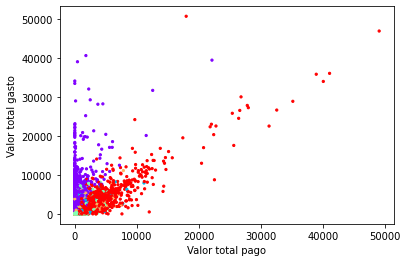

In [18]:
import matplotlib.pyplot as plt

plt.scatter(dataframe["PURCHASES"], dataframe["PAYMENTS"], c=labels, s=5, cmap="rainbow")
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")

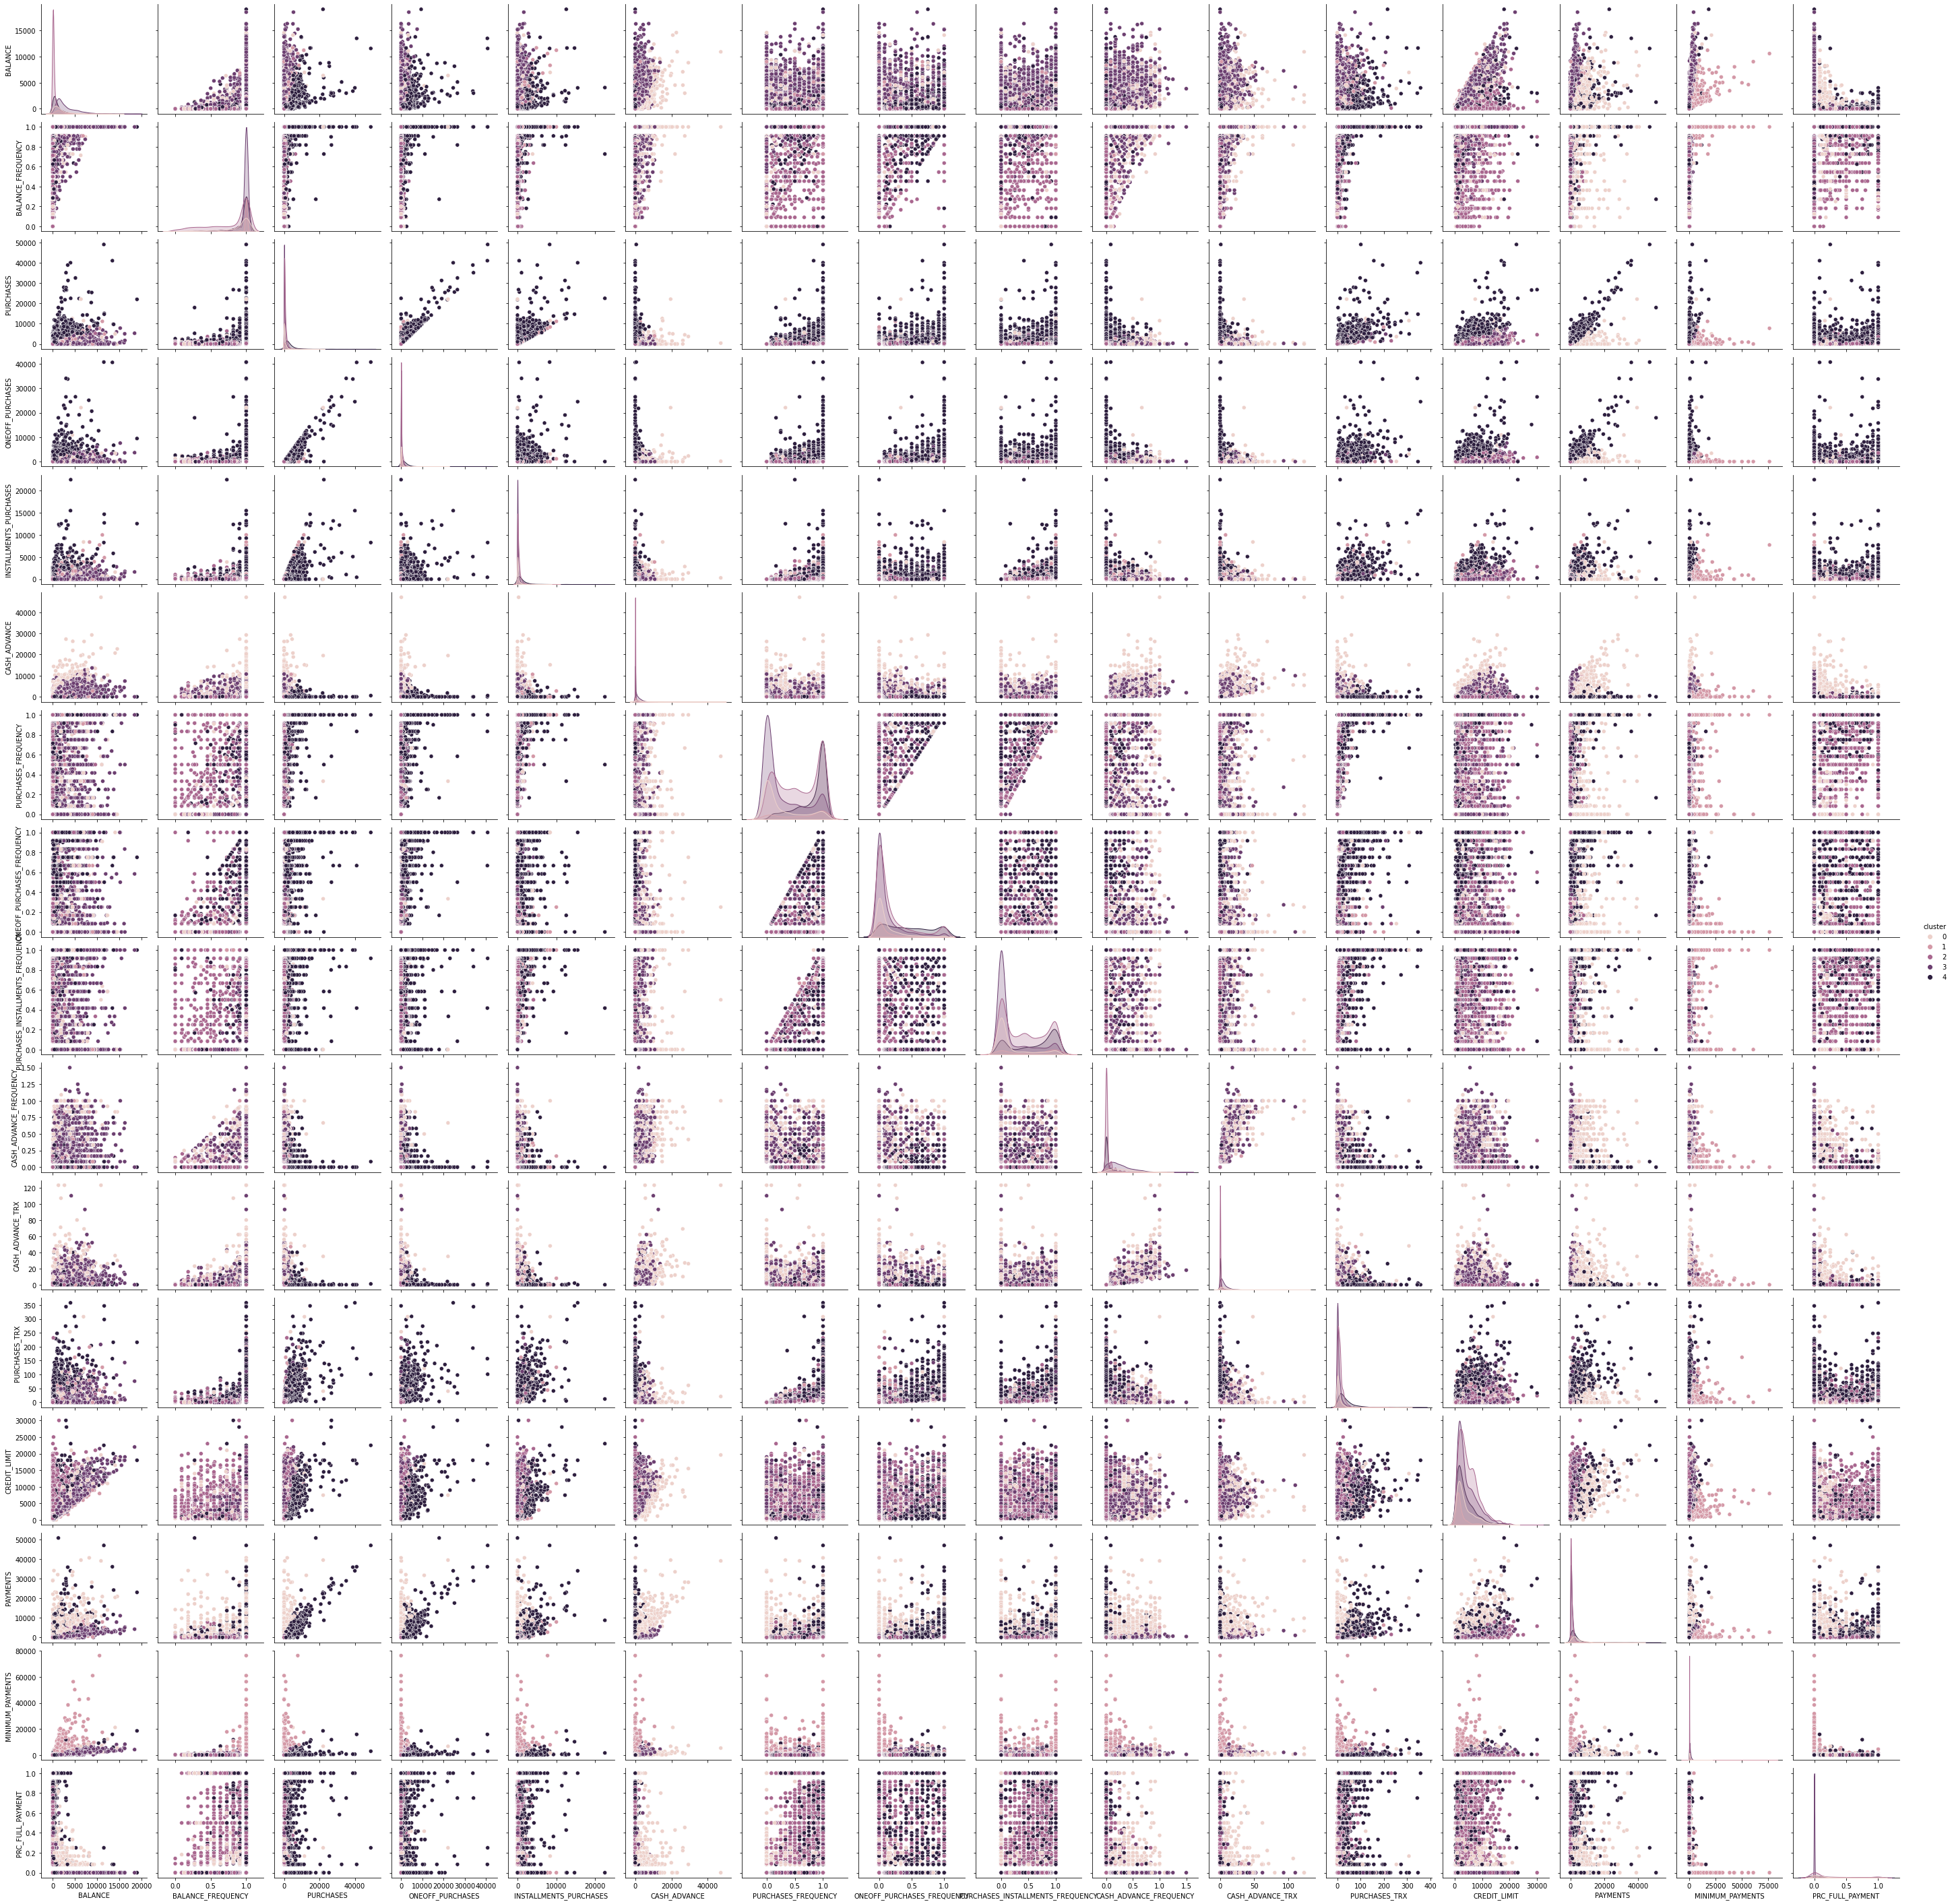

In [19]:
import seaborn as sns

dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [20]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.024195  1982.950586   0.000000   506.925348   
1         411.0  1987.501586  1854.459156  70.794108  1018.958891   
2        3275.0   444.146902   846.930394   0.000000    23.283648   
3        2648.0  3036.222685  2477.688065   6.824905  1256.126442   
4        1544.0  1144.749900  1670.581114   0.000000   210.375599   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1        1337.287314  2138.678431  11670.179850             411.0  0.989486   
2          82.980060   410.659944   9630.367575            3275.0  0.774211   
3        2173.994774  4223.841054  18495.558550            2648.0  0.963727   
4         554.332740  1370.859355  19043.138560            1544.0  0.928239   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.718306  21235.065300           1072.0  0.117384   
1        ...      7112.618584  76406.207520            411.0  0.019318   
2        ...       248.968369   4483.503862           3275.0  0.246368   
3        ...      1330.437428   8345.641905           2648.0  0.001800   
4        ...       524.184580  18621.013310           1544.0  0.278724   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186853  0.0  0.0  0.083333  0.142857  1.0  
1        0.090901  0.0  0.0  0.000000  0.000000  1.0  
2        0.346480  0.0  0.0  0.000000  0.444444  1.0  
3        0.023264  0.0  0.0  0.000000  0.000000  0.6  
4        0.367326  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [22]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [5.04284753e-01 2.72354983e-04 6.15997149e-02 3.61078867e-02
  2.55135577e-02 2.53094104e-01 6.73337278e-05 2.56962499e-05
  4.50686118e-05 5.74822402e-05 1.15774744e-03 1.33008928e-03
  7.19167320e-01 1.66132685e-01 1.79283277e-01 5.52720859e-07]
 [1.

In [26]:
# Pegandondo a variância dos centroides dos clusters
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [29]:
# Pegando as colunas com mais variância
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description["n_clients"] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
1        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
2         444.146902   628.970831    141.666342   5135.052448   814.094493   
3        3036.222685   383.621779   1637.535381   4492.371601   967.448625   
4        1144.749900  3265.474754    182.614490   4101.334295  3034.867347   

         n_clients  
cluster             
0             1072  
1              411  
2             3275  
3             2648  
4             1544  


C:\Users\Lucas\AppData\Local\Temp\ipykernel_15088\3516041636.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
